In [ ]:
!pip install -U torchvision
import torch
import gc
# Pre-trained models from PyTorch -- see more at: https://pytorch.org/vision/stable/models.html
from torchvision.models import alexnet, convnext, densenet,\
                               efficientnet, googlenet, inception,\
                               mobilenet, regnet, resnext101_32x8d,\
                               shufflenetv2, squeezenet, vgg, resnet101, mobilenet_v3_small

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Online images
!wget https://upload.wikimedia.org/wikipedia/commons/e/e1/Solar_panels_on_a_roof.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/5/55/Photovoltaikanlage.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/4/45/Berlin_pv-system_block-103_20050309_p1010367.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/3/3a/Rooftop_solar_array_at_Kuppam_i-community_office_%2854928934%29.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/e/e3/Onduleur_hybride_2.JPG


--2023-02-14 21:06:06--  https://upload.wikimedia.org/wikipedia/commons/e/e1/Solar_panels_on_a_roof.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1111659 (1.1M) [image/jpeg]
Saving to: ‘Solar_panels_on_a_roof.jpg’

Solar_panels_on_a_r 100%[===================>]   1.06M  --.-KB/s    in 0.1s    

2023-02-14 21:06:06 (9.73 MB/s) - ‘Solar_panels_on_a_roof.jpg’ saved [1111659/1111659]

--2023-02-14 21:06:06--  https://upload.wikimedia.org/wikipedia/commons/5/55/Photovoltaikanlage.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1317520 (1.3M) [image/jpeg]
Saving to: ‘Photovoltaikanlage.jpg’

Photovoltaikanl

In [ ]:
# Open images from the file directory
from PIL import Image
from IPython import display
import ipywidgets

panel1 = Image.open("s1.jpg")
panel2 = Image.open("s2.jpg")
panel3 = Image.open("s3.jpg")
panel4 = Image.open("s4.jpg")
panel5 = Image.open("s5.jpg")
panels = [panel1, panel2, panel3, panel4, panel5]

In [ ]:
# Convert images to tensor format
from torchvision.transforms.functional import to_pil_image, pil_to_tensor

torch_panels = []
for indx, img in enumerate(panels):
  torch_panels.append(pil_to_tensor(img))


In [ ]:
from torchvision.models import swin_b

In [ ]:
from torchvision.models import Swin_B_Weights

In [ ]:
# Create an instance of the swin_transformer (base version); initialize weights to the model's default weights
sw = swin_b(weights=Swin_B_Weights.DEFAULT, progress=False)

Downloading: "https://download.pytorch.org/models/swin_b-68c6b09e.pth" to /root/.cache/torch/hub/checkpoints/swin_b-68c6b09e.pth


In [ ]:
# Initailze tranforms (default)
preprocess_img = Swin_B_Weights.DEFAULT.transforms()

In [ ]:
# Process images to a format that swin transformer can understand
processed_img = []
for i in torch_panels:
  processed_img.append(sw(preprocess_img(i).unsqueeze(dim=0)))

In [ ]:
from torch.nn.functional import softmax

In [ ]:
# Import classes (truth labels) from the pre-trained model
categories = Swin_B_Weights.DEFAULT.meta["categories"]

In [ ]:
# Get top 3 classification categories for each images
preds_sw = []
for i in processed_img:
  preds_sw.append([categories[idx] for idx in i.argsort()[0].numpy()][::-1][:3])

In [ ]:
# See predictions
for pred in preds_sw:
    print(pred)

['solar dish', 'prison', 'tile roof']
['solar dish', 'tile roof', 'radio telescope']
['patio', 'solar dish', 'mountain bike']
['solar dish', 'radio telescope', 'breastplate']
['solar dish', 'barn', 'tile roof']


In [ ]:
# Output 'Ture' or 'False' for solar panel detection
for pred in preds_sw:       # for indx, pred in enumerate(preds_sw): 
  if "solar dish" in pred:
    print("True")           # print("Image #" + indx + ": True")  
  else:
    print('"False')         # print("Image #" + indx + ": False")

True
True
True
True
True


<ipython-input-23-8628ef4ed069>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([],[]); ax.set_yticks([],[]);
<ipython-input-23-8628ef4ed069>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([],[]); ax.set_yticks([],[]);


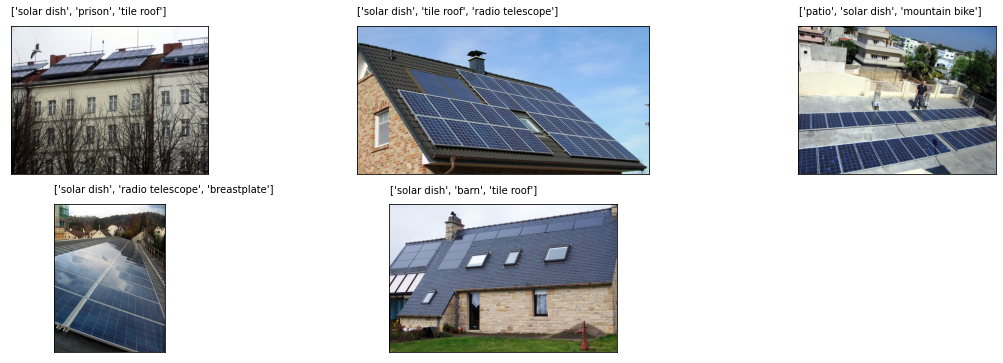

In [ ]:
# Visualize classification results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,6))

for i, img in enumerate(panels):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(img)
    ax.set_xticks([],[]); ax.set_yticks([],[]);
    ax.text(0,0, "{}\n".format(preds_sw[i]))

Reference: https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-image-classification-using-pre-trained-models